In [1]:
import pickle
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.signal import butter, filtfilt

In [2]:
with open("sensor_data_imputed.pkl", "rb") as f:
    sensor_data = pickle.load(f)

In [3]:
def apply_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter(order, cutoff, fs=fs, btype="low", analog=False)
    y = filtfilt(b, a, data)
    return y

In [4]:
cutoff = 6
fs = 100
order = 2

for day in range(1, 4):
    for mat in range(1, 3):
        for sensor in range(8):
            for heater in range(10):
                original = sensor_data[f"day{day}"][f"mat{
                    mat}"][sensor][heater]["Resistance Gassensor"]

                y_filtered = apply_lowpass_filter(original, cutoff, fs, order)

                sensor_data[f"day{day}"][f"mat{
                    mat}"][sensor][heater]["Filtered"] = y_filtered

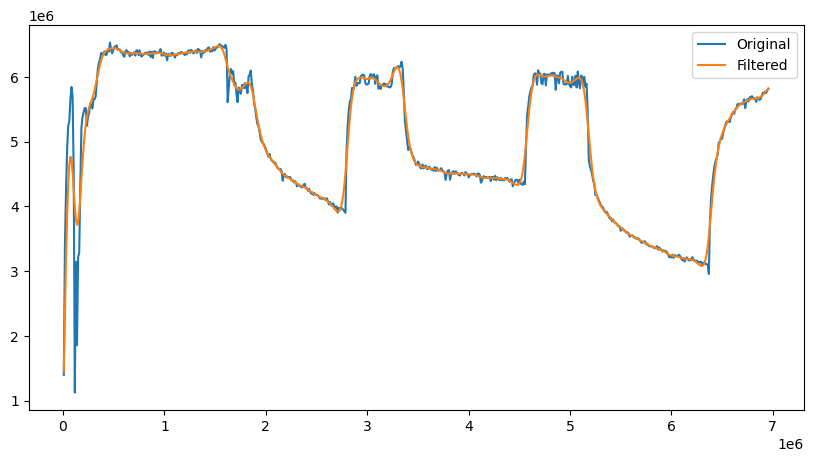

In [5]:
heater = sensor_data["day1"]["mat1"][0][0]
gas_data = heater["Resistance Gassensor"].values
filtered_data = heater["Filtered"].values
time = heater["Time Since PowerOn"].values

plt.figure(figsize=(10, 5))
plt.plot(time, gas_data, label="Original")
plt.plot(time, filtered_data, label="Filtered")
plt.legend()
plt.show()

In [6]:
def plot_filtered_data(sensor_data, day, mat, sensor):
    title = f"Day {day}, Matrix {mat}, Sensor {sensor}"
    fig = go.Figure()
    for i, data in sensor_data[f"day{day}"][f"mat{mat}"][sensor].items():
        fig.add_trace(go.Scatter(x=data["Time Since PowerOn"],
                                 y=data["Filtered"],
                                 mode="lines",
                                 name=f"Step {i}"))

    fig.update_layout(title=title, title_x=0.5, width=1000, height=600)

    fig.update_yaxes(type="log")
    fig.show()

In [7]:
plot_filtered_data(sensor_data, 1, 2, 0)

In [8]:
with open("sensor_data_filtered.pkl", "wb") as f:
    pickle.dump(sensor_data, f)